## 控制



前馈控制器：
    重力补偿等，到达大概位置|速度

    追踪目标q_r(t)

    使用逆动力模型推算系统输入 u(t),使系统追到q_r(t)附近的  q_r^*(t)

    之后靠反馈控制器 处理误差

    e(t) = q_r(t) -  q_r^*(t)



    
反馈控制器：

处理剩余误差、扰动。

常见PID控制器，滑模控制器（P随时间变化的PD控制器）

是误差的函数

$$  \Delta u(t)  = f(e  , \dot e   , \ddot e) $$

PID 控制器的误差的函数为

$$   \Delta u(t)  = K_p e + K_i  \int e \mathrm{d}t + K_d \dot e $$

其中 *P控制器*
$K_p e$
可以理解为：

目前机器人距离目标点还有一些误差， 误差越大，我们把输入正比例放大， 误差越小，输入正比例放小

I 控制器 理解为 

我们怎么调整P控制器，总无法到达目标，比如有一个外力刚好可以抵消掉 $K_p e$, 那么总会残留一些误差。

我们把残留的误差积分起来，加到输入里。


D 控制器 $K_d \dot e$ 理解为：

已在目标位置附近，不希望冲太猛，不然会在目标位置震动，

 (速度) 越大 --》误差减小越大， $\dot e $ 越负向增大 ，$K_d \dot e$ 越负，

 起降速、稳定作用。
 



例子：

假设系统动力学模型为：

$$ M \ddot x(t) + D\dot x (t) + K x(t) = H^T \space U(t) $$

$$ H^T \space U(t)  = H^T (u(0) + \Delta u(t)) $$

需要追踪的轨迹为 

$x_r(t)$

定义:(轨迹差)

$$ e(t) = x_r(t) - x(t) $$

那么，我们可以算出 
$x_r(t)$ 
下的前馈 
$u(t)$

$$u(t) = (H_T)^{-1}  (M \ddot x(t) + D\dot x (t) + K x(t))$$

在这条轨迹上的真实的飞船动力学性能：

难以建模或小

$$ M \ddot x(t) + D\dot x (t) + K x(t)  +\alpha (t )= H^T \space U(t) $$


整理：

$$H_T \space \Delta u(t) = \alpha(t)$$

此时设计反馈控制器，使用PID:

$$ \Delta u(t) = (H_T)^{-1}  (K_p e + K_i  \int e \mathrm{d}t + K_d \dot e )$$

带入得：

$$ \alpha (t) = K_p e + K_i  \int e \mathrm{d}t + K_d \dot e $$


由于 $\alpha (t) $ 是有界，bounded.

所以总可以设计一个PID控制器的增益，使得 e(t) 收敛为0附近。其大小取决于  $\alpha (t) $ 。



相反，仅使用PID控制系统，那么

$$K_p e + K_i  \int e \mathrm{d}t + K_d \dot e = M \ddot x(t) + D\dot x (t) + K x(t)  +\alpha (t )$$

是无界的，所以e(t)  【轨迹差】 无法收敛到0.

即，仅用PID控制器无法保证飞船可以追上该轨迹。



### 适合只用PID控制器的系统特征

1. 起始点在目标位置附近， 即e 较小，变化较慢的系统。

那么 
$$ M \ddot x(t) + D\dot x (t) + K x(t)  +\alpha (t )  = H^T (u(0) + \Delta u(t)) $$

其中，由于系统变化较慢， 所以

$\ddot x_r(t) \approx 0$

$\dot x_r(t) \approx 0$

由于在目标位置附近，所以

$Kx_r(t) \approx H^T u(0)$

化简，仍可得：

$$ \alpha (t) = K_p e + K_i  \int e \mathrm{d}t + K_d \dot e $$

所以系统仍然可控。


PID仅仅用于单输入，单输出系统。

当遇到多输入，多输出系统时，如上例，H是一个矩阵，此时仍然需要用到模型中的H矩阵把多输入多输出系统控制器转化为PID控制器来设计。

这里还是用到了模型信息，

这也是为什么需要动力学模型的原因之一。



### 定点控制

目标：从一个位置移动到另一个位置，并保持稳定。

主要关注最终位置的**精度**和**稳定性**。 通常不强调运动过程中的时间约束。

如果有时间要求，时间约束通常是次要的。





### 轨迹跟踪

轨迹跟踪要求机器人精确地沿着预定的轨迹运动，步进需要**跟随路径上的位置** ， 还要满足**时间和速度**的要求。

对整个运动过程的精确性和动态特性要求更高。



### 逆运动学控制

基与机器人动力学模型的**前馈控制方法**，通过动力学模型计算所需的关节力或力矩，实现机器人沿预定轨迹运动。

通常用于复杂的机器人系统中，能够提供更高的控制精度。

实际应用中通常与 **反馈控制** 结合。

### 总结

显示世界里大部分模型都是**非线性但连续|可导**, **前馈控制**负责把总误差压倒足够小，**反馈控制**再完成最后这段**近似线性**的部分。


### 机器人动力学分析

指哪打哪

需要

1. 驱动每个电机完成*角位移控制*

对每个电机进行动力学建模：

$$ \tau = k_t I = J \ddot \theta $$

其中 $K_t$  是电机的**转矩常数**

I是电流， 

J是转子的**转动惯量**

$\ddot \theta$ 是角加速度

$\tau$ 是**由电流引起的转矩**。



2. 减速机动力学建模

...



3. 小扰动， pid处理


4. 目标扰动建模
...



## 常见伺服启动器控制模式

1. 外部脉冲位置控制
2. 速度控制
3. 力矩控制
4. JOG 控制
5. 全闭环位置控制（外接第二编码器）
6. 混合控制： 位置力矩/位置速度/速度力矩



伺服电机控制特性

控制方式 IGBT SVPWM 正弦波控制

编码器反馈方式 ： 总线式编码器 ，rs485协议

归一化伺服参数PC 调试工具，使用刚性等参数，可快速实现伺服参数调整

易用性功能一键自整定、单参数整定、超级跟随功能


*陷波滤波器抑制机械共振*，支持三组陷波器,50Hz~4000Hz

摆振抑制抑制末端振动

DI/DO 设置可自由分配数字量输入/ 输出

报警功能
过压、欠压、过流、过载、过热、过速、主电源输入缺相、再生制动状态异常、
位置偏差过大、编码器反馈错误、制动率过大、行程超限、EEPROM 错误等。

调试软件
通过Motion Studio 2 调试软件可以调节电流环、位置环、速度环的各个参
数，更改输入输出信号有效电平和电机参数，并可以文件形式进行参数的
导入导出，方便驱动器和不同电机或不同负载的匹配；监视在梯形波测试
运行下速度、位置误差等波形。


通讯功能
支持USB：基于Modbus 协议（依据USB2.0 规格），可连接电脑进行参
数设定和状态监控。
L8P 支持RS485 总线通讯方式（RJ45 接口）, 基于Modbus 协议，最大32 轴。

动态制动内置动态制动，有特殊派生型号去掉动态制动。


位置比较输出支持42 点位置比较输出。
黑匣子功能
支持黑匣子功能，可以捕获预先设定条件前后的数据，配合Motion Studio 2 软件读取数据，以进一步分析。

**适用负载惯量小于电机惯量的30 倍**。



### 输入信号

DI 点数：10 点（支持共阴和共阳2 种方式）
可分配的输入信号：
y 伺服使能输入（SRV-ON）
y 警报清除（A-CLR）
y 增益切换输入（GAIN）
y 偏差计数器清除输入（CL）
y 控制模式切换输入（C-MODE）
y 转矩限制切换输入（TL-SEL）
y 减振控制切换输入 1（VS-SEL1）
y 减振控制切换输入 2（VS-SEL2）
y 指令脉冲禁止输入（INH）
y 内部指令速度选择 1输入（INTSPD1）
y 内部指令速度选择 2输入（INTSPD2）
y 内部指令速度选择 3输入（INTSPD3）
y 指令分频倍频切换输入 1（DIV1）
y 正向驱动禁止输入（POT）
y 负向驱动禁止输入（NOT）
y 零速箝位输入（ZEROSPD）
y 速度指令符号输入（VC-SIGN）
y 转矩指令符号输入（TC-SIGN）
y 强制报警输入（E-STOP）

PR 模式可分配的输入信号：
y 路径触发 (CTRG)
y 回零触发 (HOME)
y 急停触发 (STP)
y 路径 0~3（ADD0~ADD3）
y 正向点动 (PJOG)
y 反向点动 (NJOG)
y 正限位 (PL)
y 负限位 (NL)
y 原点输入 (ORG)

### 输出信号

DO 点数：6 点（2 点单端输出，4 点双端输出）
可分配的输出信号：
y 伺服准备输出（SRDY）
y 外部制动器解除信号（BRK-OFF）
y 定位完成（INP1）
y 速度到达输出（AT-SPEED）
y 零速箝位检测输出（ZSP）
y 报警输出（ALARM）
y 速度一致输出（V-COIN）
y 位置指令有无输出（P-CMD）
y 速度限制中输出（V-LIMIT）
y 速度指令有无输出（V-CMD）
y 伺服使能开启状态输出（SRV-ST）
y 正限位有效输出（POT-OUT）
y 负限位有效输出（NOT-OUT）

PR 模式可分配的输入信号

y 指令完成（CMD-OK）
y 路径完成 (PR-OK)
y 回零完成 (HOME-OK)

### 负载转动惯量

负载转动惯量表示负载的惯量。负载*转动惯量越大，响应性越差*，过大可能会导致运动不稳定。伺服电机的允许负载转动惯量的大小受限。该值为大致标准，会因伺服电机的驱动条件而异。

在超过允许负载转动惯量的情况下使用时，减速时会发生**过电压警报**。此外，伺服驱动器内置制动电阻时， 会发生“过载警报”。发生此类警报时，请采取以下任一措施：
■ 减小转矩限制值。
■ 减小减速曲率。
■ 降低最高转速。
■ 采取以上措施后仍无法解除警报时，需要外置制动电阻。



### 使用环境

使用温度：0℃ ~55℃（不冻结） 超过45℃请降额使用，每超1℃降额2%

振动小于0.5g（4.9m/s2）10-60Hz（非连续运行）

### 位置控制 
    1. 最大输入脉冲频率 如 4Mhz, 500kHz  ,200kHz
        电子齿轮比
        转矩限制

### 驱动器的连接

使用TN/TT 电网电源，

在输入电源侧加装电磁接触器。

使用ALM（故障信号）切断主回路电源。

连接保护接地PE段子。

整个系统接地处理，否则可能导致**产品误动作**。

切断电源后设备内部电容仍有残余电压，请至少**等待 5分钟**再进行接线等操作，否则可能
导致触电。


在垂直轴上使用伺服系统时，请遵守以下注意事项：

设置安全装置以免工件在报警、碰撞限位等状态下**落下**。


使用**电源滤波器**减小电磁干扰的影响

### 抱闸电机接线注意事项

■ 内置制动器的电机运转时，制动器可能会发出咔嚓声，功能上并无影响。
■ 制动器线圈通电时 ( 保持制动器开放状态 )，在轴端等部位可能发生磁通泄漏。在电
机附近使用磁性传感器等仪器时，请加以注意。
■ 电机抱闸线缆长度需要充分考虑到线缆电阻导致的压降，抱闸工作需要保证输入电压
能够保证在24V 左右，这样才能保证抱闸功能的正常使用。
■ 抱闸禁止与其他用电器共用电源，防止因其他用电器工作，导致电压或电流降低，最
终引起抱闸误动作。


### 再生制动电阻选型及接线

再生制动电阻作用
当电机的力矩与旋转方向相反时（常见场景如减速、垂直轴下降等场景），此时能量会从
负载反馈回驱动器。这时候的能量回馈首先由驱动器内的电容接收，使得电容的电压上升，
当上升到一定电压值时，需要由再生电阻消耗多余的能量，否则会导致过电压。

再生能量与多种因素相关，减小再生能量功率的措施有：
*减小转动惯量*、
*增加减速时间*、
*减小负载转矩*、
*降低最大转速*等。

In [21]:

import numpy as np
#转子惯量 10^-4 kg.m^2
I_axis = 1.66 * 10**(-4)
#负载惯量
I_load = I_axis *  15 
#再生转矩#负转矩

#电容可吸收最大回生能量 Ec (J)  
Ec_J = 22.85



#电机运行参数
#电机转矩
current_torque = 0

#电机转速 #rpm
angle_speed = 3000




#制动能量
E1 = (I_load +I_axis  ) * angle_speed**2 / 182


T = 2#s
En =  (I_load +I_axis  ) * angle_speed**2  / ( 2*np.pi * 60 / T)
print(f"产生的制动能量 = {round(E1,2)} J    ,En{En}")



#再生电阻功率
Pr = (E1-Ec_J)/ (0.5 * T)

#恶劣环境 降频
#
safe_index = 1- 0.4
print(f"所需回生电阻功率  Pr = \t{round(Pr,3)}")
print(f"所需回生电阻功率 修正值 Pr = \t{round(Pr / safe_index,3)}")
#再生电阻值需等于内置电阻值，否则需要增大



产生的制动能量 = 131.34 J    ,En126.81465865562222
所需回生电阻功率  Pr = 	108.491
所需回生电阻功率 修正值 Pr = 	180.818


In [8]:
182/ (2*3.14)   #每分30次



28.980891719745223

In [9]:
2*3.1415 *60/2

188.49

## 判断系统类型

线性定常

线性时变

非线性


$$C(t) = 2+ 3\frac{\rm{d} r(t)}{\rm d(t)} + \frac{\rm{d}^2 r(t)}{\rm{d} t^2} \space\text{非线性}$$
$$C(t) = 4+ 5 r(t) \space\text{非线性}$$
$$C(t) = r^2(t) \space\text{非线性}$$
$$C(t) = 3r(t) + 5\int_{-\infty}^{t} r(\tau) \rm{d} \tau \space\text{线性}$$
$$\frac{\rm d ^2 C(t)}{\rm{d} t^2} + 3\frac{\rm{d} C(t)}{\rm {d} t} + 2C(t) = r(t) \space\text{线性}$$

$$C(t) = 5+ r(t) + t \frac{\rm{d} r(t)}{\rm{d} t}  \space\text{非线性}$$

有常数项，不满足齐次性。
积分、微分
系数带t，有时变性。

控制系统性能
稳快准

稳定性

快速性（tp峰值， tr上升 ， ts调节， \sigma 超调量）

准确性 （e_ss 稳态误差)

控制系统数学模型
$$\frac{\rm d ^2 C(t)}{\rm{d} t^2} + 3\frac{\rm{d} C(t)}{\rm {d} t} + 2C(t) = r(t)$$

例子
给出微分方程

$$RC\frac{\rm{d} U_c}{\rm {d}t} + U_c = U_0 \cdot 1(t)$$

步骤： L变换， 求U(s) , 逆L变换。

$$RC s \cdot U_c(s) - RC\cdot U_c(0) + U_c(s) = U_0 \frac{1}{s} $$

$$U_c(s) = \frac{U_0}{s(RCs +1)} + \frac{RC}{RCs+1}\cdot U_c(0)         $$

$$U_c(s) = \frac{U_0}{s} - \frac{1}{s+ \frac{1}{RC} }\cdot U_0 + \frac{1}{s+ \frac{1}{RC}}U_c(0)         $$

$$Uc(t) = U_0(1 - e^{-\frac{1}{RC}t}   ) + U_c(0) e^{-\frac{1}{RC}t}     \space \{t\geq 0\}                 $$

例子 给出传递函数

$$G(s) = \frac{C(s)}{R(s)}  =   
\frac{b_0 s^m+ b_1 s^{m-1} \cdots + b_m}
{1 s^n  + a_1 s^{n-1}  +\cdots + a_n}
\space \{ n\geq m \}
$$

分母次数高， 分子次数低。在物理上可实现。

分母=0极点 ，分子=0 零点

C(s) 输出

R(s) 输入

$s = \sigma + j\omega$
拉氏变换所用的复变量

要点：

1. 传递函数是线性时不变系统的一种**动态数学模型**
2. 只与系统本身结构有固安， 而与系统输入、输出**具体形式无关**。
3. 是在**零初始条件**下定义的。 （相对静止）
4. n\geq m ， 且所有系数均为实数。
5. 有局限性。只能表示**单输入、单输出**关系。 不反应输入变量和中间变量关系（中间过程都省略掉了）。


传递函数常用表达形式

零点极点表达式
$$
G(s) = \frac
{K^* \prod_{j=1}^{m} (S - Z_j) }
{\prod_{i=1}^{n} (S - P_i)}
$$

$K^* $ 根轨迹增益。
$Z_j$ 零点，
$P_i$ 极点。

时间常数表达式

$$G(s)  =
\frac{K \prod _{j=1}^{q} (\Tau _{j} S + 1 )   \prod _{j=p+1}^{m}  (\Tau _j^2  S^2 + 2 g\Tau _{j} S )                }
{S^V \prod _{i=1}^{q}(T_i S+1)   \prod _{i=q+1}^{n-V} (T_i^2S^2  +2gT_iS+1  )   }
$$      

K 传递系数

例子
$$G(s)=
\frac
{2(5s+1)}
{S^2(2S+1)(3S+1)}
$$

典型环节的传递函数

1. 比例

K:     $G(s) = K$

2. 积分

$
\frac{\rm d C(t)}{\rm d t} = r(t)
$

$
C (t) = \int r(t)\rm d t
$

$G(s) = 1/s$

3. 微分

$C(t) = \frac{\rm d r(t) }{\rm d t}$

$G(s) = S$

4. 惯性环节：

$ \Tau \frac{\rm d C(t)}{\rm d t} + C(t) = r(t) $

$G(s) = \frac{1}{TS +1}$

5. 一阶微分环节

$C(t) = T \frac{\rm d r(t)}{\rm d t} + r(t)$

$G(s) = \Tau S +1$

6. 二阶微分环节

$G(s) = \Tau ^2 S^2 +2\tau g s + 1$

7. 二阶 振幅

$G(s) = \frac{1}{\Tau ^2 S^2  2gT S +1 }$

8. 延迟环节
$C(t) = r(t - \tau)$

$G(s) = e^{-\tau S}$

结构图变换原则
1. 变换前后， 前向通道中，**传递函数乘积不变**。
2. 变换前后回路中，**传递函数乘积不变**。

串联， 
G_1(s) -> G_2(s)  ==>  G_1(s) \cdot G_2(s)

并联

G_1(s)       ==>  G_1+G_2

G_2(s) 

反馈环节*

    Rs  --  -> G1(s)   --  --> C(s)

        -|               |
    
        <--    H(s)   <--


$C(s) = [R(s) - H(s)\cdot C(s)]\cdot G_1(s)    $

$
\frac{C(s)}{R(s)} = \frac{G_1}{1+ G_1 H}
$

$$= \frac{前向通道}{1 + 前向通道 \times 反馈} $$

## 控制系统的时域分析法

### 典型输入信号
1. 阶跃响应

2. 斜坡信号
$r(t) = K t$
3. 加速度信号
$r(t)  = 1/2 Rt^2$

4. 脉冲信号
$\delta (t)$

$\int _{-\infty}^{\infty} \delta(t)\rm{d} t =1$

$\frac{1}{\xi}  * \xi$

$\xi << 被控对象时间常数$

5. 正弦信号
$r(t) = A sin(\omega t)$

### L变换表


$$
\begin{matrix}
& 时域 &复频域  &  & \\
&1  & \frac{1}{S} &  &  \\
\\
&t  &\frac{1}{S^2}  &  &  \\
\\
&\frac{1}{2}t^2  & \frac{1}{S^3}  &  &  \\
\\
&\delta (t)  & 1 &  & \\
\\
& A \sin(\omega t) & \frac{A\omega}{S^2+\omega^2}  &  & \\
\\
& e^{-nt} & \frac{1}{S+n}  &  & \\
&  &  &  & 

\end{matrix}
$$

性能指标

1. 上升时间tr
2. 峰值时间tp
3. 调节时间ts($\pm 5\% $,$\pm 2\% $)
4. 超调量$\sigma$

$\sigma = \frac{C_{max} - C_{\infty}}{C_{\infty}} \times 100 \%$

5. 稳态误差 

$e_{ss} = \lim _{t-> \infty} e(t)$

## 一阶系统的时域响应

数学模型为一阶微分方程的控制系统

$$
\Phi(s)= \frac{C(S)}{R(S)} 
$$

$$\Phi(S) = \frac{1}{TS+1}$$

$$RC \frac{d C(t)}{d t} + C(t) = r(t)$$

$$C(S) = \Phi(S) \cdot R(S) = \frac{1}{TS+1}\cdot \frac{1}{S} = \frac{1}{S} - \frac{1}{S+ \frac{1}{T}}$$

$$C(t) = 1 - e^{-\frac{t}{T}    } , t\geq0$$

相关指标

超调量 $\sigma =0$,

T值大小反应慢性， T越小，慢性越小，响应越快

t=3T 时， C(t) = 95%

t=4T 时， C(t) = 98.2%

## 一阶系统单位脉冲响应

$$C(S) = \Phi(S) \cdot R(S) = \frac{1}{TS+1}  = \frac{ \frac{1}{T}  }{ S + \frac{1}{T} }$$

$$C(t) = \frac{1}{T} e^{-\frac{1}{T} t}  ,t\geq 0 $$

T 越小，响应时间越短，快速性越好

单位脉冲响应是单位阶跃的**导数**， 而单位阶跃是单位脉冲的**积分**。

## 一阶系统的单位斜坡信号

$$C(S) = \Phi(S) \cdot R(S) = \frac{1}{TS+1} \cdot \frac{1}{S^2} = \frac{1}{S^2} - \frac{T}{S} + \frac{T^2}{TS+1}

$$C(t) = (t-T) + T e^{-\frac{t}{T}}$$

$r(t) = t$

$$e(t) = r(t) - C(t) = T - T e^{-\frac{t}{T}}$$

稳态误差为T。

T 越小， e(t) 越小， 更准确。

结论：

系统对**输入信号导数**的响应， 等于对**该输入信号响应**的导数；

系统对**输入信号积分**的响应，等于系统**对该输入响应**的积分；

积分、微分可以*跨越*传递函数。(线性性质？？)

## 二阶系统的时域响应

$T^2 \frac{d^2 C(t)}{dt^2}+ 2\xi T \frac{d C(t)}{dt} + C(t) = r(t)
$

$\Phi(S) = \frac{\omega _n^2 }
{S^2 + 2\xi \omega _n S + \omega _n^2}
$

首1 形式  ，  $\xi $阻尼比 ， $\omega _n = 1/T$ 无阻尼自然震荡频率 



D: 二阶系统闭环极点：

$D(S) = S^2 + 2\xi \omega _n S + \omega _n^2 = 0$

$S_ {1,2}  =  -\xi \omega _n \pm \omega _n \sqrt{\xi^2 -1}$

-------------

极点位置分类：
$S = \sigma + j \omega$

$0<\xi<1$ , （欠阻尼）一对负实部共轭复根 **

$\xi =1$ （临界阻尼，非震荡）, 两个相等负实根，  $S_1 = S_2 = -\xi \omega _n =  -\omega _n$

$\xi > 1 $ (过阻尼，越大变化越慢，约小响应越快) , 两个不相等的负实根

$\xi = 0$ , (无阻尼，等幅震荡)两个共轭复根 ， $S_{1,2} = \pm j\omega _n$

$-1< \xi < 1$ ， 具有正实部共轭复根 ， 不稳定

$\xi < -1$ , 两个不相等正实根。 不稳定




## 二阶系统的单位阶跃响应 **

$
C(S) = \Phi(S) \cdot R(S) = 
\frac{\omega _n^2 }
{S^2 + 2\xi \omega _n S + \omega _n^2} 
\cdot 
\frac{1}{S}
$

令 $\omega _d = \omega _ n\sqrt{1-\xi ^2}$  有阻尼的自然震荡频率

$\theta = \arctan (\frac{\sqrt{1-\xi^2}}{\xi})$  阻尼角

$\sigma =  \xi \omega_n$ 衰减系数

$$
C(t) = 1- \frac{1}{\sqrt{1-\xi^2}  }  e^{-\xi \omega_n t} \sin (\omega _{d} t + \theta) 
$$

当 $<0\xi<1$ ：欠阻尼：
二阶系统的单位阶跃响应为，具有震动衰减的正弦形式。

$\xi \omega_n $ 越大， 后虚轴越远， 衰减的越快。

omega_d=49.575699692490474, = 7.89 Hz


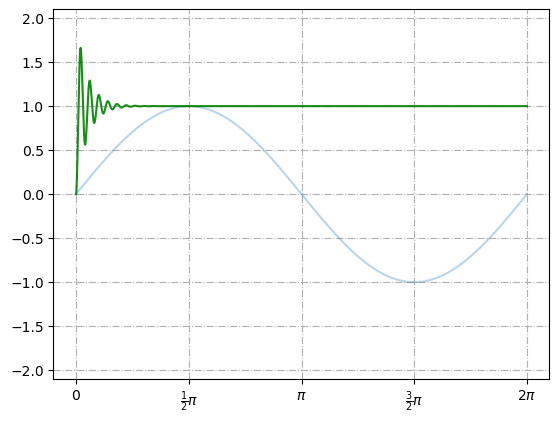

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def f(t):
    return np.sin(t)#*np.sin(t) #* np.cos(2*np.pi*t)
def g(t):
    #return np.cos(2*t)*np.cos(t) + np.sin(t)*np.sin(t)
    xi=0.13
    omega_n = 50
    omega_d = omega_n*np.sqrt(1-xi**2)
    print(f"omega_d={omega_d}, = {round(omega_d/(2*np.pi), 2)} Hz")
    theta = np.arctan( np.sqrt(1-xi**2) /xi )
    #二阶阻尼震荡
    return 1 - (1.0/np.sqrt(1 - xi**2))*np.exp(-1 * xi * omega_n * t) *np.sin(omega_d * t + theta  )
xrange = np.pi* 2.0
yrange = 2
a = np.arange(0,xrange  , 0.002)

cc = plt.subplot(1,1,1)# (行数， 列数，当前区域) 
plt.xticks(np.arange(-xrange,xrange,np.pi/2))
cc.set_ylim(- yrange -0.1, yrange+0.1)
#plt.yticks([-1,0,1])
# _ = plt.yticks(ticks = [-1,0,1],ha = 'right')
_ = plt.xticks(ticks = np.arange(0,xrange+0.1 ,np.pi/2), \
labels = ['0',r'$\frac{1}{2}\pi$',r'$\pi$',r'$\frac{3}{2}\pi$',r'$2\pi$'] \
)
_=plt.grid(True, linestyle='-.')
plt.plot(a,f(a),alpha=0.3)
plt.plot(a,g(a),'g-',alpha=0.9)
plt.show()

#### $\xi > 1 $ (过阻尼，越大变化越慢，约小响应越快) 

两个不相等的负实根
$\xi$ 越大，响应月满

$ S_{1,2} = -\xi \omega _n \pm  \omega _n\sqrt{\xi ^2 -1}$

令 $T_1 =-1/S_1$ ,   $T_2 =-1/S_2$

$
C(s) = \Phi (S) \cdot \frac{1}{S}
$

$
= \frac{\omega_n ^2}
{(S+ \frac{1}{T_1})  (S+ \frac{1}{T_2})}
\cdot \frac{1}{S}
$

$$
C(t)= 
1+
\frac{e^{-\frac{t}{T_1}}}
{\frac{T_2}{T_1} -1}

+

\frac{e^{-\frac{t}{T_2}}}
{\frac{T_1}{T_2} -1}

\space, t\geq0
$$
